# Problem Statement 

A construction firm wants to develop a suburban locality with new infrastructure but they might incur losses if they cannot sell the properties.

# Understanding the Problem Statement


Business Objective:Maximize Selling  Home in Suburban Location.

Constraints :Minimise The losses 


# Understanding Success Criteria  for Given Problem


Business Success Criteria:Increase the sales of Homes.

ML success Criteria:create ML model Accuracy at least 80%.

Economical success Criteria:Increase the sales 40% than previous year.

Importing Libraries and Dataset 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (15,15)
plt.style.use('ggplot')

In [4]:
data = pd.read_csv(r"/Users/macbookpro/Desktop/Github pro/Final/SVM-BlackBox/SalaryData_Train.csv")
data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Returns number of rows and columns of the dataset
df.shape

(30161, 14)

In [6]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
# Returns columns from data 
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
# Returns the Descriptive summary of dataset
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Since,Our targeted Output variable is Salary,let's see that

 <=50K    0.751069
 >50K     0.248931
Name: Salary, dtype: float64


<Axes: xlabel='count', ylabel='Salary'>

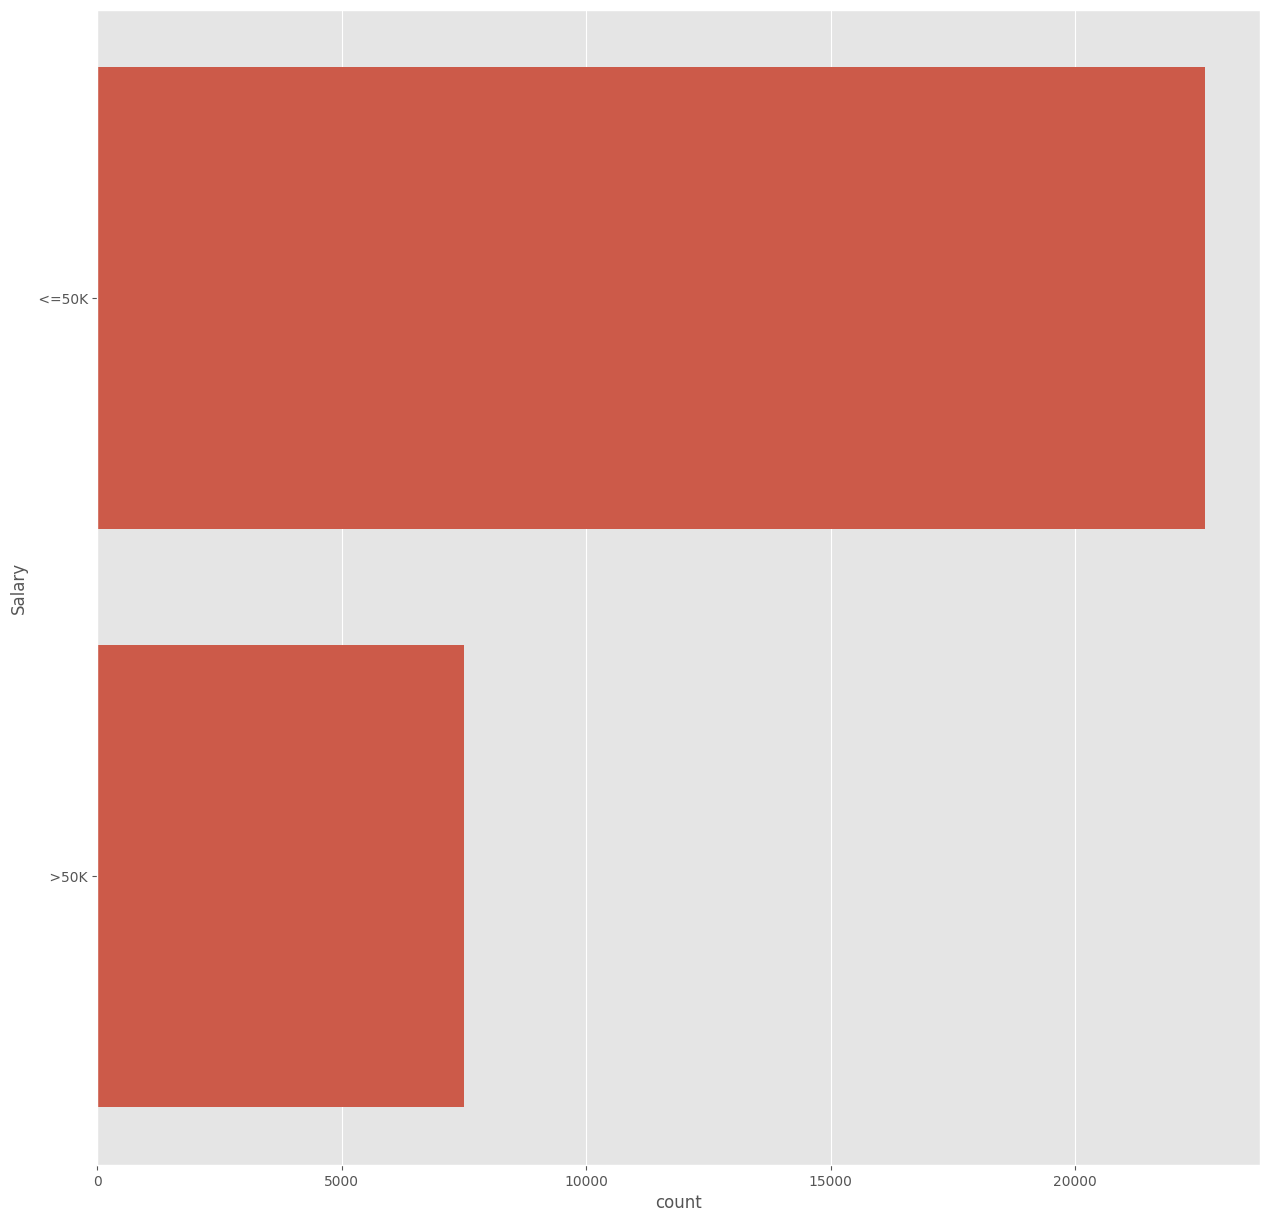

In [10]:
print(data['Salary'].value_counts()/data.shape[0])
sns.countplot(data['Salary'])

So far 75% of the data shows people with Salary <=50k.

<Axes: >

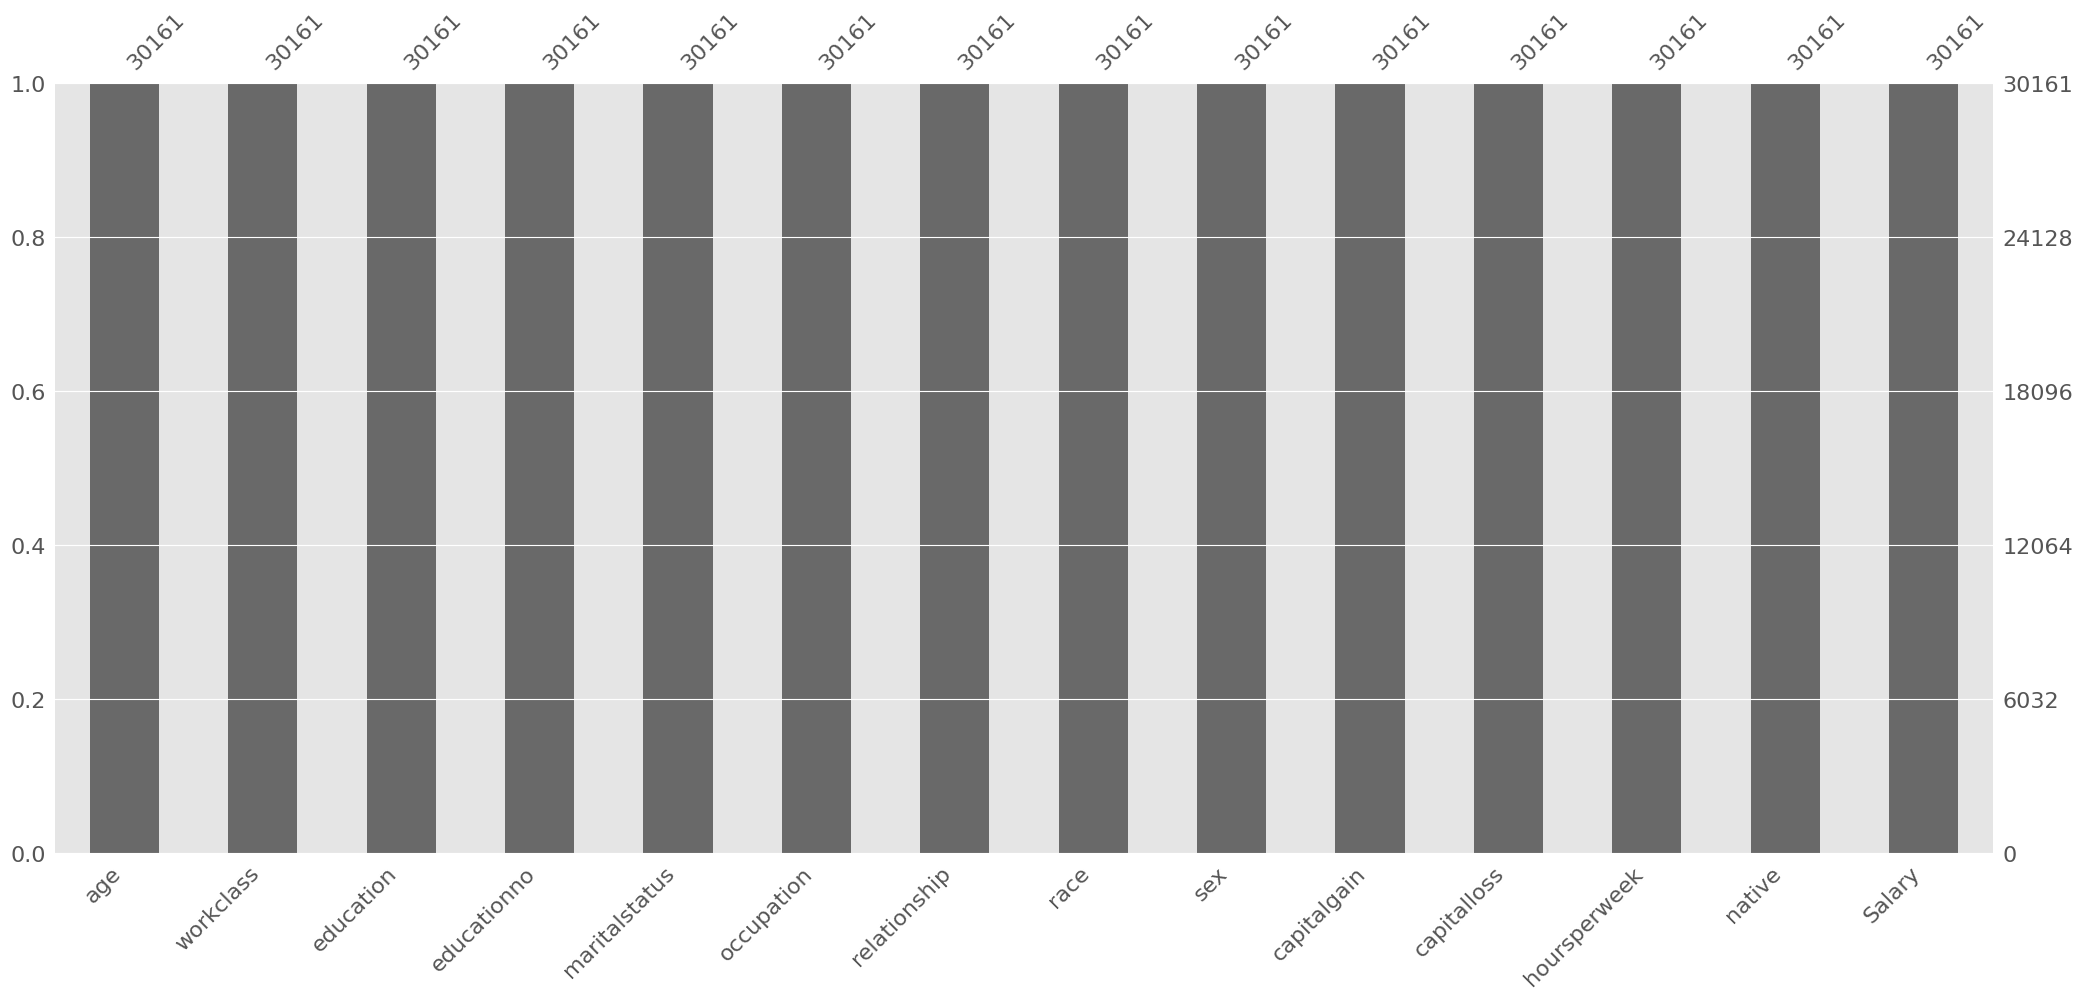

In [11]:
msno.bar(data)


we may observe that 0 missing values in data.

(array([4869., 5579., 5760., 5925., 3810., 2412., 1278.,  359.,  114.,
          55.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

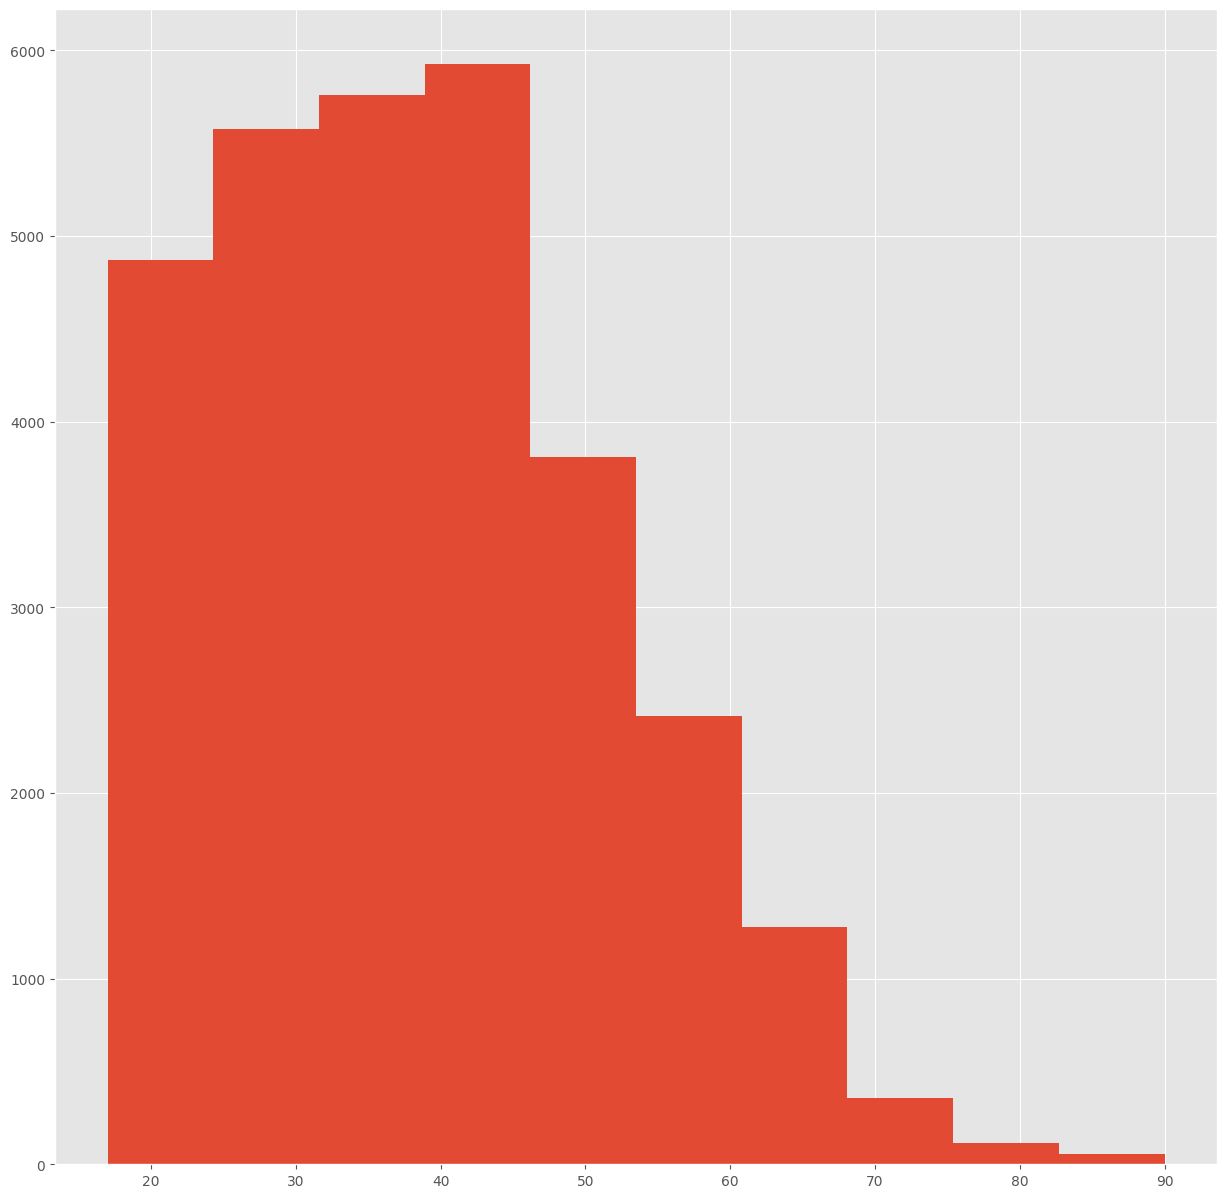

In [12]:
plt.hist(data['age'])

The age is positively skewed

(array([  511.,  1877.,  1995., 16581.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

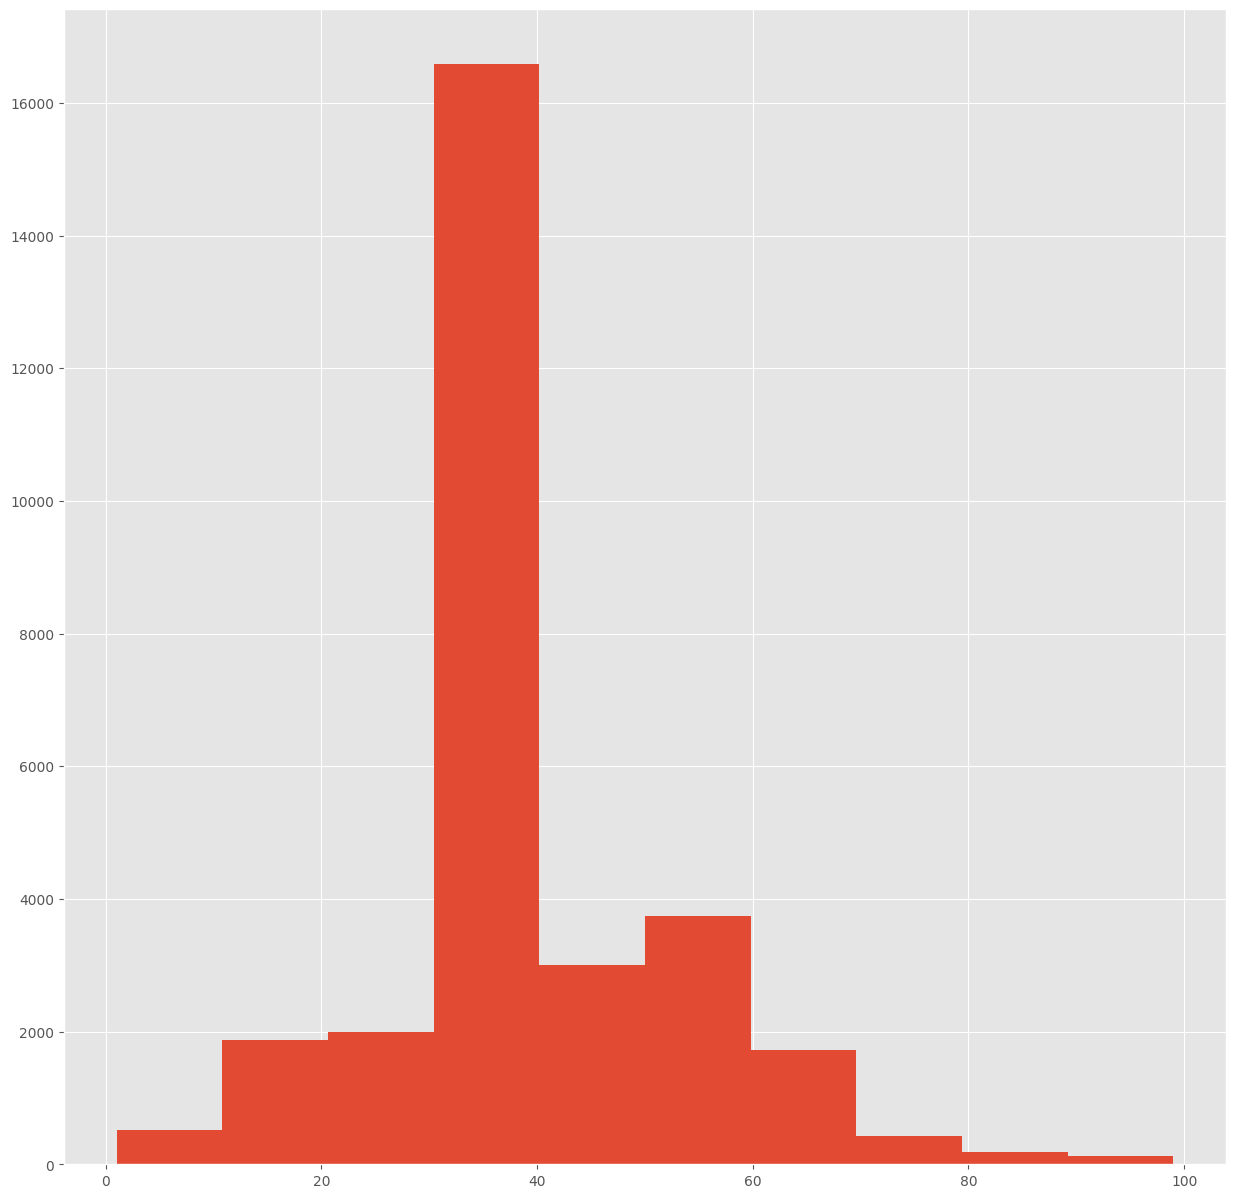

In [13]:
plt.hist(data['hoursperweek'])

/var/folders/sr/xkd0mm717wx5jh4h4982cbg80000gn/T/ipykernel_1198/3880246347.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')


<Axes: >

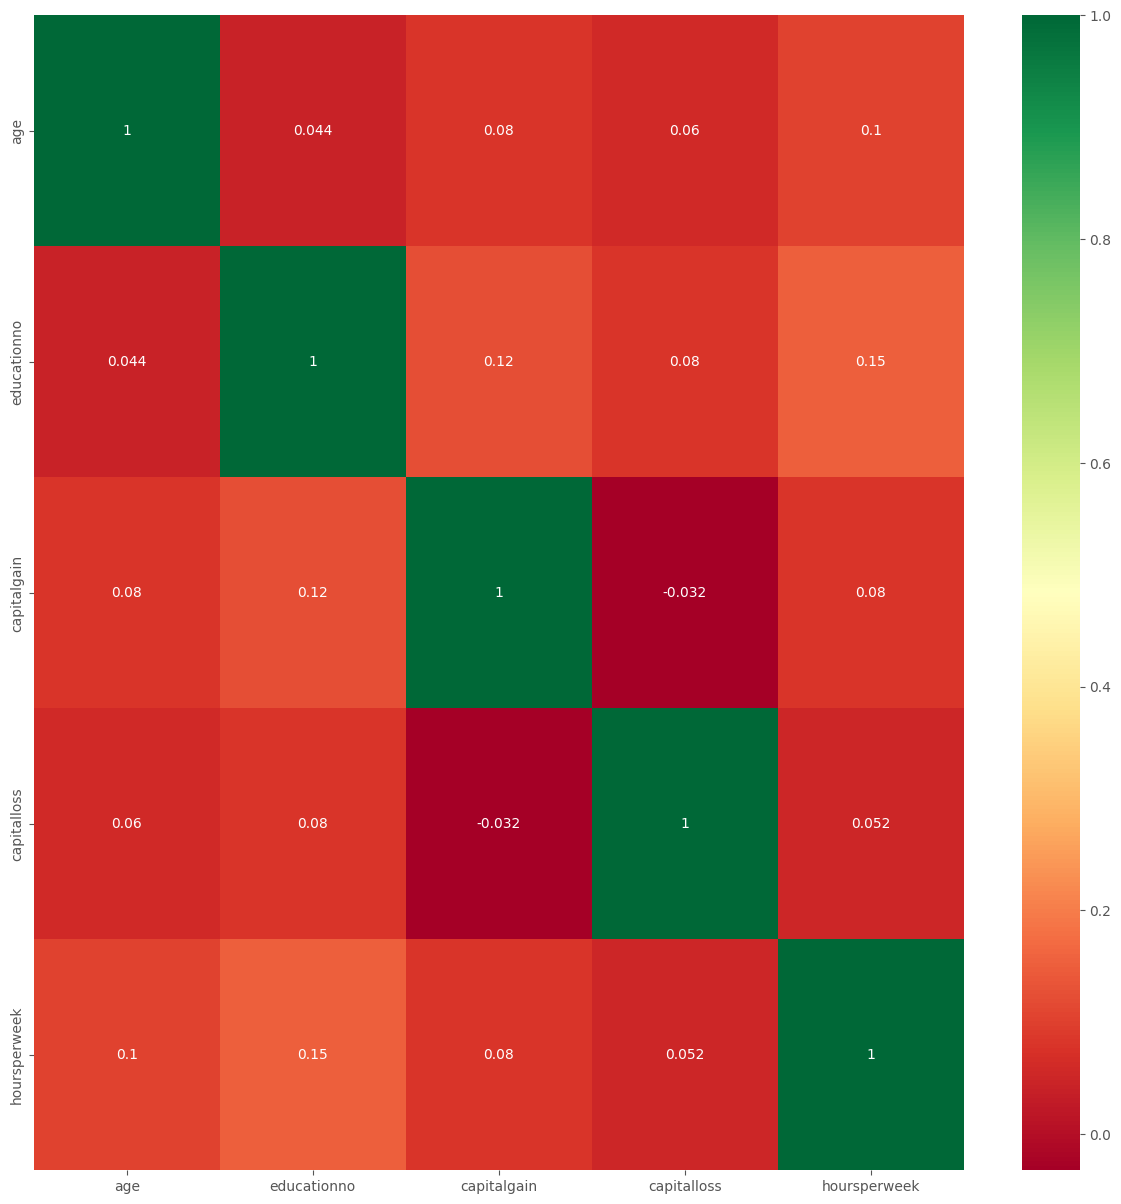

In [14]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

<Axes: xlabel='age'>

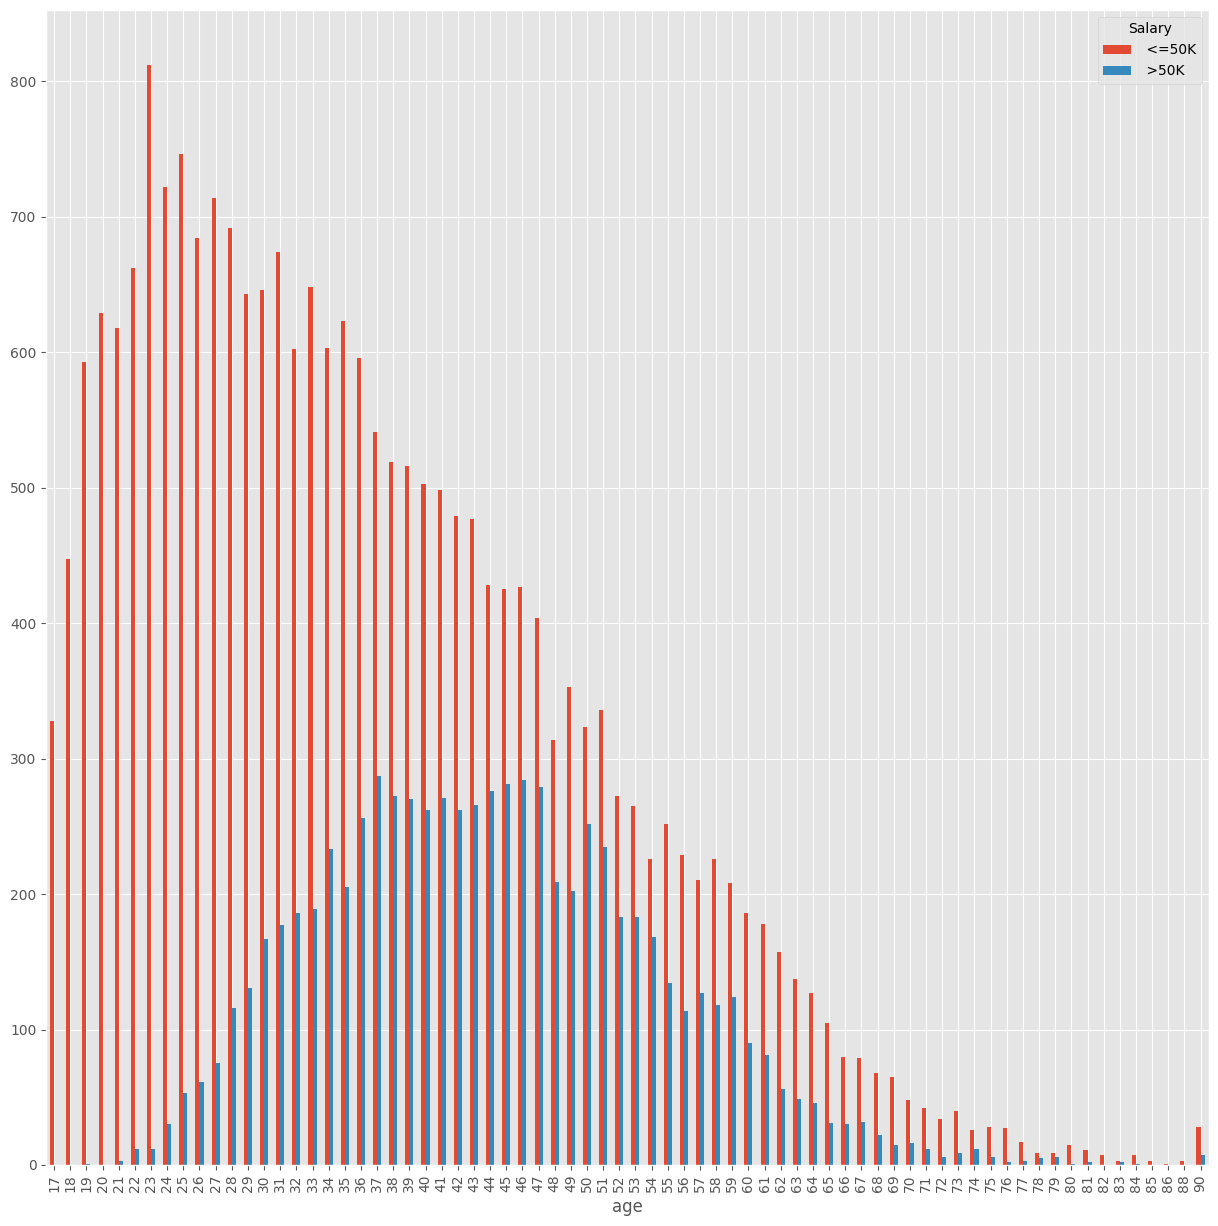

In [15]:
pd.crosstab(data['age'],data['Salary']).plot(kind='bar')

Lets work on our categorical variables

In [16]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

We can drop `Education` column as we already have educationno column

In [17]:
data.drop(columns='education',inplace=True)
data.shape

(30161, 13)

In [18]:
data.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [19]:
data = data[['Salary','age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native']]

In [20]:
data

,Salary,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,<=50K,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,<=50K,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30157,>50K,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30158,<=50K,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30159,<=50K,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


Lets create Dummy variables for other columns

In [21]:
data['Salary'] = data['Salary'].replace(['<=50K','>50K'],['1','0'],regex=True)
data

,Salary,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,1,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,1,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,1,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30157,0,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30158,1,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30159,1,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [22]:
data['Salary'].value_counts()/data.shape[0]

 1    0.751069
 0    0.248931
Name: Salary, dtype: float64

We just converted our Salary column to show 1 and 0, 1 is for <=50K and 0 is >50K

In [23]:
data.columns

Index(['Salary', 'age', 'workclass', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [24]:
data_dummy = pd.get_dummies(data, columns=['workclass','maritalstatus','occupation','relationship','race','sex','native'],drop_first=True)
data_dummy

,Salary,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,1,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,50,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,38,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,53,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,28,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1,27,12,0,0,38,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,0,40,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,1,58,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,1,22,9,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Lets build our model

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [26]:
train,test = train_test_split(data_dummy, test_size = 0.25)
print(train.shape,test.shape)

(22620, 80) (7541, 80)


In [27]:
print(train['Salary'].value_counts()/train.shape[0])
print(test['Salary'].value_counts()/test.shape[0])

 1    0.749514
 0    0.250486
Name: Salary, dtype: float64
 1    0.755735
 0    0.244265
Name: Salary, dtype: float64


In [28]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)



In [31]:
# Kernel = Linear

model_linear = SVC(kernel = 'linear')
model_linear.fit(train_x,train_y)
pred_test_linear = model_linear.predict(test_x)

In [32]:
np.mean(pred_test_linear == test_y)

0.8488264155947487

In [33]:
# Kernel = rbf

model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(train_x,train_y)
pred_test_rbf = model_rbf.predict(test_x)

In [34]:
np.mean(pred_test_rbf == test_y)


0.8490916324094948

So based on both the test, we are getting better accuracy with Linear model, we will use this model to predict on our test data

In [35]:
test = pd.read_csv(r"/Users/macbookpro/Desktop/Github pro/Final/SVM-BlackBox/SalaryData_Test.csv")
test.shape

(15060, 14)

We have 15060 rows and 14 columns, lets transform our data to make sure it is similar to how we transformed our Train data

<Axes: >

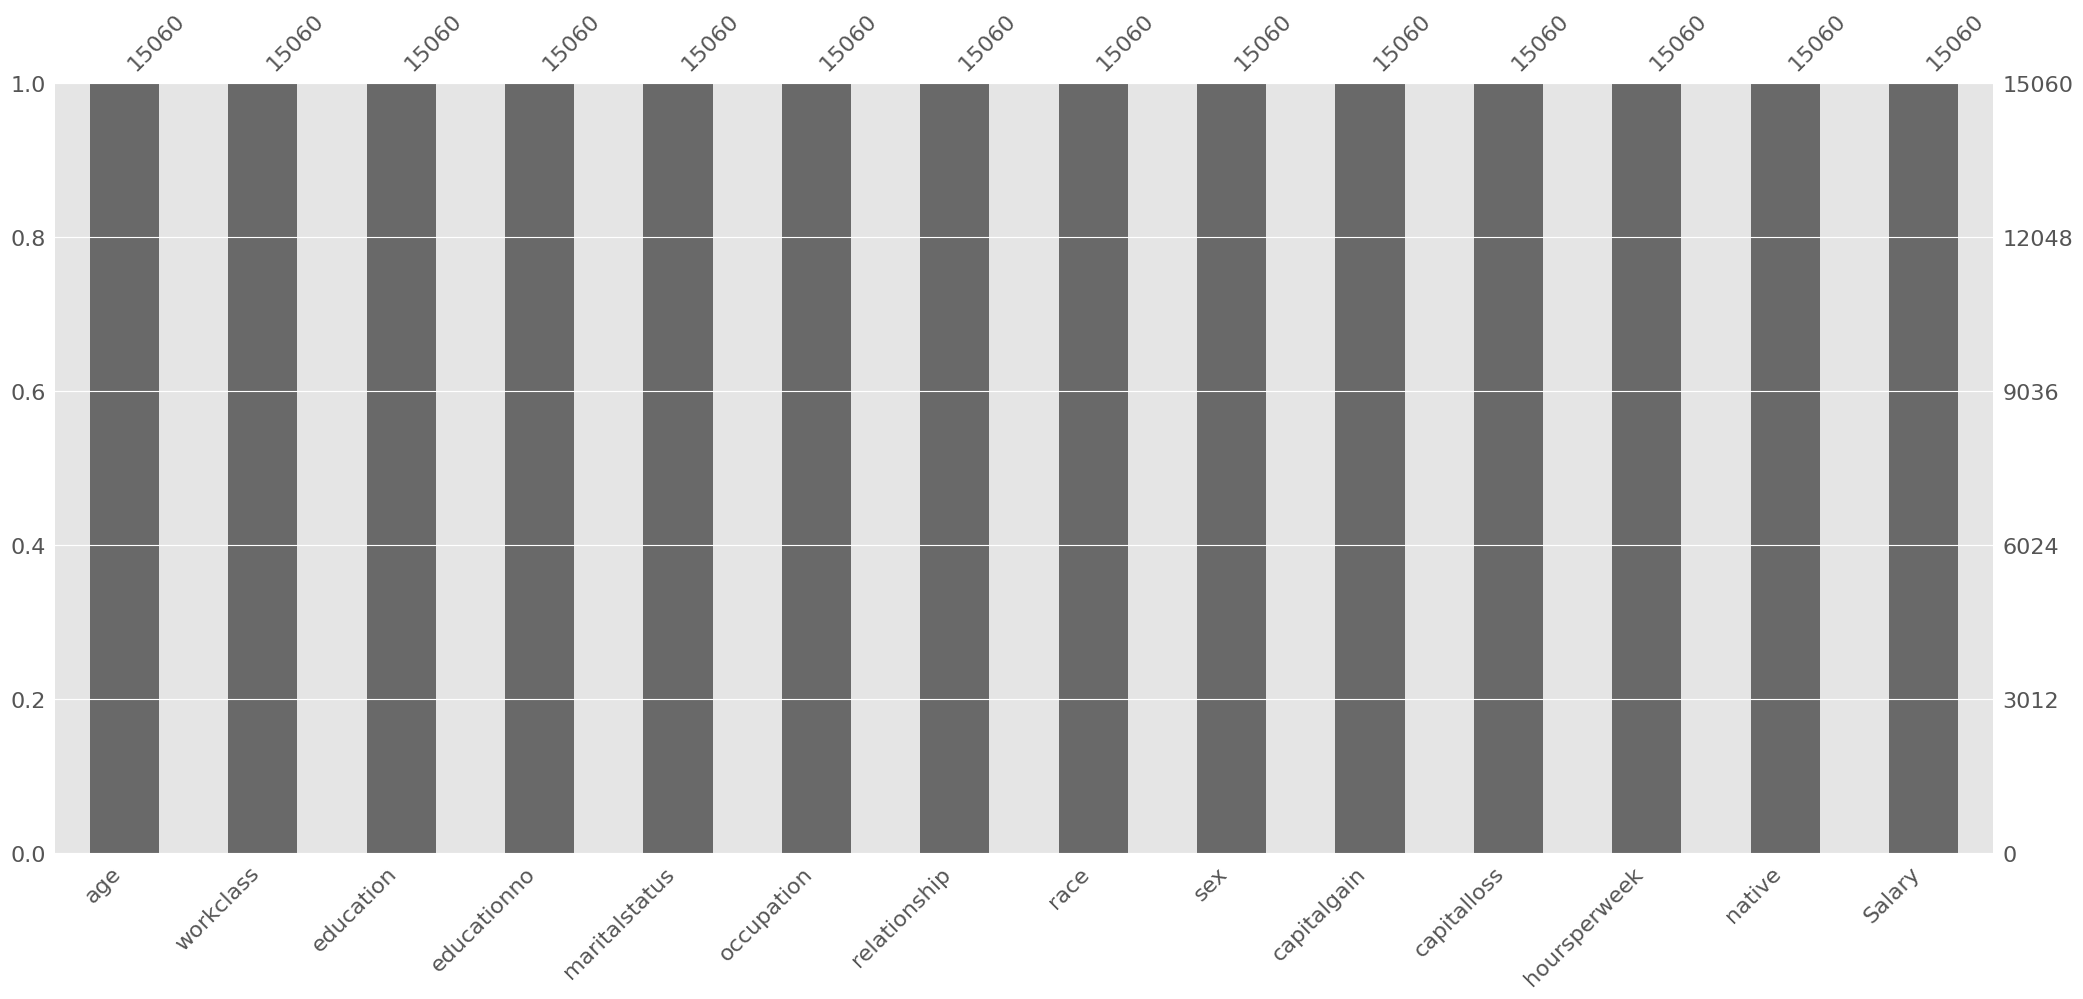

In [36]:
msno.bar(test)

There are no missing values in our test dataset

 <=50K    0.754316
 >50K     0.245684
Name: Salary, dtype: float64


<Axes: xlabel='count', ylabel='Salary'>

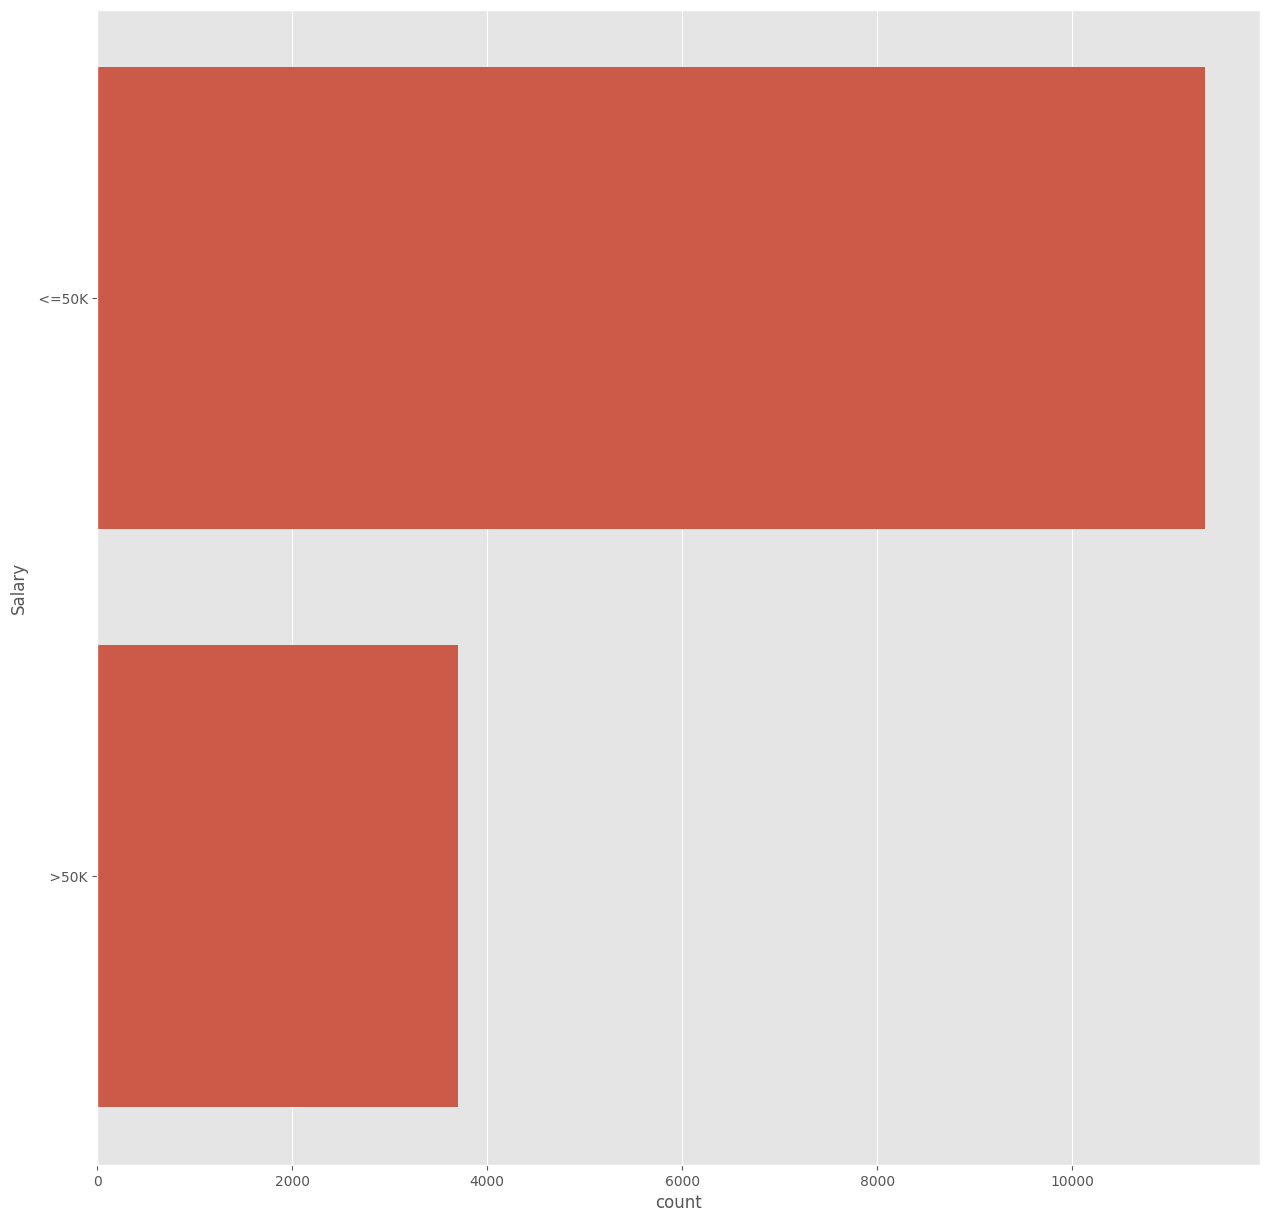

In [37]:
#Lets see the break up of Salary column
print(test['Salary'].value_counts()/test['Salary'].shape[0])
sns.countplot(test['Salary'])

So data in our test set is similar to our training set

Making changes in the data to be similar as train data

In [38]:
test.drop(columns='education',inplace=True)
test

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [39]:
test.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [40]:
test = test[['Salary','age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native']]
test

,Salary,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,<=50K,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,<=50K,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,>50K,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,>50K,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,<=50K,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,<=50K,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,<=50K,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,<=50K,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,<=50K,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [41]:
test['Salary'] = test['Salary'].replace(['<=50K','>50K'],['1','0'],regex=True)
test

,Salary,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,1,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,0,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,0,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,1,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,1,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,1,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,1,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [42]:
data_dummy = pd.get_dummies(test, columns=['workclass','maritalstatus','occupation','relationship','race','sex','native'],drop_first=True)
data_dummy

,Salary,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,1,25,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,38,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,28,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,44,10,7688,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,34,6,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1,33,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,1,39,13,0,0,36,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,1,38,13,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,1,44,13,5455,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
data_x = data_dummy.iloc[:,1:]
data_y = data_dummy.iloc[:,0]

In [44]:
sc = StandardScaler()

data_x = sc.fit_transform(data_x)

In [45]:
# Kernel = Linear

pred_data_linear = model_linear.predict(data_x)

In [46]:
np.mean(pred_data_linear == data_y)

0.84867197875166

We have completed this project by creating a model which predicts at 85%